In [35]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model as linear_model
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import copy

In [3]:
# original ames dataframe
ames_df = pd.read_csv("../data/AmesHousing.txt", sep="\t")

In [36]:
# for processing with NAs
ames_df2 = copy.copy(ames_df)

In [4]:
train = ames_df
df = train

In [20]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2929
Data columns (total 82 columns):
Order              2903 non-null int64
PID                2903 non-null int64
MS SubClass        2903 non-null int64
MS Zoning          2903 non-null object
Lot Frontage       2419 non-null float64
Lot Area           2903 non-null int64
Street             2903 non-null object
Alley              196 non-null object
Lot Shape          2903 non-null object
Land Contour       2903 non-null object
Utilities          2903 non-null object
Lot Config         2903 non-null object
Land Slope         2903 non-null object
Neighborhood       2903 non-null object
Condition 1        2903 non-null object
Condition 2        2903 non-null object
Bldg Type          2903 non-null object
House Style        2903 non-null object
Overall Qual       2903 non-null int64
Overall Cond       2903 non-null int64
Year Built         2903 non-null int64
Year Remod/Add     2903 non-null int64
Roof Style         29

In [4]:
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Let's check if we have any duplicate PID:

In [19]:
len(ames_df["PID"]) == len(set(ames_df["PID"]))

True

In [5]:
ames_df_rows, ames_df_columns = ames_df.shape
print("rows = {0} columns = {1}".format(ames_df_rows,ames_df_columns))

rows = 2930 columns = 82


Categorical (Nominal): A categorical variable is one that has two or more categories, but there is no intrinsic ordering to the categories.  e.g.- house style- 1 story, 2 story etc.

Ordinal: An ordinal variable is similar to a categorical variable but there is a clear ordering of the variables. e.g.- pool quality.

Electrical           1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        23
Mas Vnr Type        23
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Lot Frontage       490
Fireplace Qu      1422
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
dtype: int64

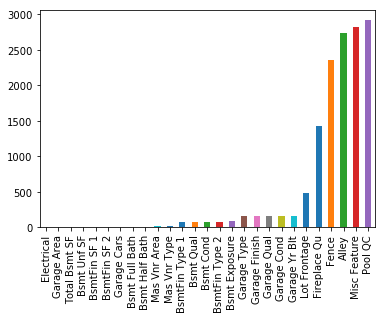

In [6]:
missing_ames = ames_df.isnull().sum()
missing_ames = missing_ames[missing_ames > 0]
missing_ames = missing_ames.sort_values()
missing_ames.plot.bar()
missing_ames

In [5]:
# print NA columns
'''
ind = ames_df['Garage Area'].isnull()
ames_df[ind]['Garage Area']
'''
# multiple ways to drop na
ames_df = ames_df.dropna(subset = ['Electrical','Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF', 
                                   'BsmtFin SF 1','Garage Cars', 'BsmtFin SF 2', 'Bsmt Full Bath', 
                                   'Bsmt Half Bath', 'Mas Vnr Area', 'Mas Vnr Type'])
# ames_df = ames_df[np.isfinite(tmp['Garage Area'])]
# ames_df = ames_df[pd.notnull(tmp['Garage Area'])]

ames_df.shape

(2903, 82)

In [37]:
ames_df2['Lot Frontage'].fillna(ames_df2['Lot Frontage'].median(), inplace = True)
ames_df2['Mas Vnr Area'].fillna(ames_df2['Mas Vnr Area'].median(), inplace = True)
ames_df2['Garage Yr Blt'].fillna(ames_df2['Garage Yr Blt'].median(), inplace = True)

In [ ]:
# replace na for categorical also



In [6]:
# ames_df.describe()
ames_df['SalePrice'].describe()

count      2903.000000
mean     180393.842921
std       79814.696125
min       12789.000000
25%      129100.000000
50%      160000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([  8.,  47., 199., 538., 684., 478., 298., 213., 142.,  86.,  75.,
         30.,  41.,  25.,  11.,   9.,   4.,   3.,   3.,   3.,   4.,   0.,
          0.,   0.,   2.]),
 array([ 12789.  ,  42477.44,  72165.88, 101854.32, 131542.76, 161231.2 ,
        190919.64, 220608.08, 250296.52, 279984.96, 309673.4 , 339361.84,
        369050.28, 398738.72, 428427.16, 458115.6 , 487804.04, 517492.48,
        547180.92, 576869.36, 606557.8 , 636246.24, 665934.68, 695623.12,
        725311.56, 755000.  ]),
 <a list of 25 Patch objects>)

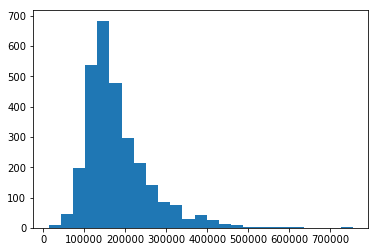

In [7]:
plt.hist(ames_df['SalePrice'], bins=25)

count    2930.000000
mean       12.020969
std         0.407587
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: log_SalePrice, dtype: float64


(array([  2.,   0.,   0.,   0.,   3.,   3.,   8.,  27.,  49., 131., 314.,
        662., 619., 463., 315., 184.,  93.,  42.,  12.,   3.]),
 array([ 9.45634071,  9.66024732,  9.86415394, 10.06806055, 10.27196717,
        10.47587379, 10.6797804 , 10.88368702, 11.08759363, 11.29150025,
        11.49540687, 11.69931348, 11.9032201 , 12.10712672, 12.31103333,
        12.51493995, 12.71884656, 12.92275318, 13.1266598 , 13.33056641,
        13.53447303]),
 <a list of 20 Patch objects>)

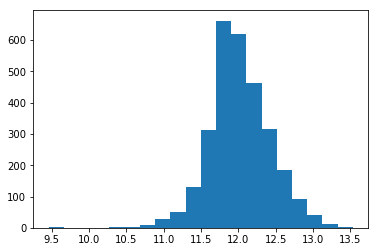

In [7]:
ames_df['log_SalePrice'] = np.log(ames_df['SalePrice'])
print(ames_df['log_SalePrice'].describe())
plt.hist(ames_df['log_SalePrice'], bins=20)

In [49]:
train.Street = pd.Categorical(train.Street).codes

In [46]:
# write a loop for all variables in qualitative- encode
train["Lot Shape"], mapping_index = pd.Series(train["Lot Shape"]).factorize()

In [47]:
mapping_index

Index(['IR1', 'Reg', 'IR2', 'IR3'], dtype='object')

In [48]:
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,1,NaN,0,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,1,NaN,1,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,1,NaN,0,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,1,NaN,1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,1,NaN,0,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [42]:
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,1,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,1,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,1,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,1,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,1,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [50]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr = corr.SalePrice
corr

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.508882
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.340256
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Street             0.059519
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0

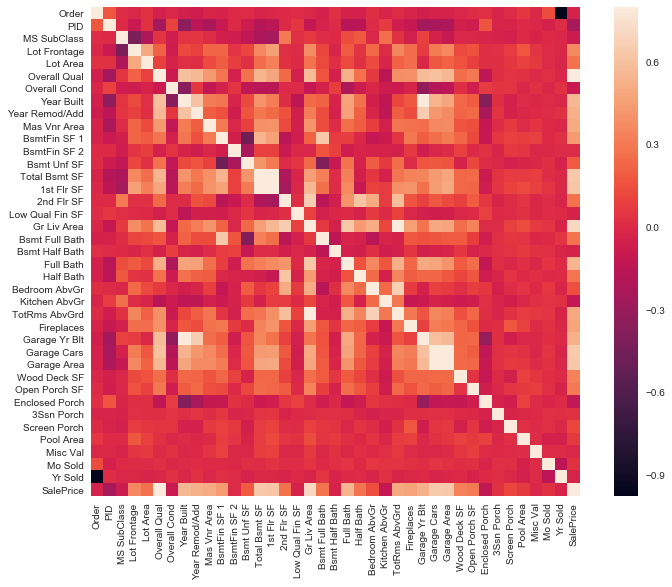

In [74]:
# for continuous only 
corr_mat = ames_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
# annot = True for specifying corr ratios
sns.heatmap(corr_mat, vmax=.8, square=True);

In [11]:
corr = ames_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr = corr.SalePrice
corr

SalePrice          1.000000
Overall Qual       0.799121
Gr Liv Area        0.708248
Garage Cars        0.647001
Garage Area        0.639161
Total Bsmt SF      0.634647
1st Flr SF         0.625499
Year Built         0.558468
Full Bath          0.546100
Year Remod/Add     0.532265
Garage Yr Blt      0.531269
Mas Vnr Area       0.508606
TotRms AbvGrd      0.496296
Fireplaces         0.474912
BsmtFin SF 1       0.433796
Lot Frontage       0.356396
Wood Deck SF       0.328813
Open Porch SF      0.307211
Half Bath          0.282143
Bsmt Full Bath     0.276703
2nd Flr SF         0.271417
Lot Area           0.265792
Bsmt Unf SF        0.183368
Bedroom AbvGr      0.144928
Screen Porch       0.114262
Pool Area          0.069103
3Ssn Porch         0.032927
Mo Sold            0.030556
BsmtFin SF 2       0.008022
Misc Val          -0.015326
Yr Sold           -0.027831
Order             -0.033773
Bsmt Half Bath    -0.034763
Low Qual Fin SF   -0.037359
MS SubClass       -0.083610
Overall Cond      -0

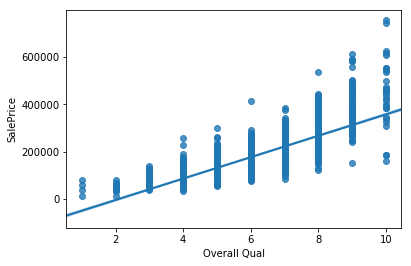

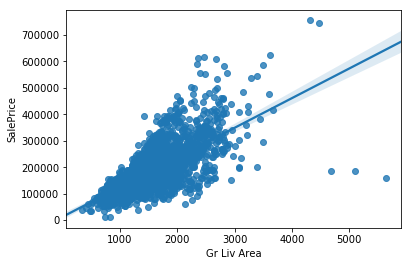

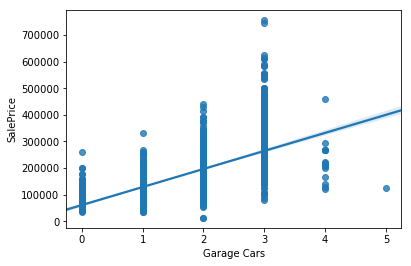

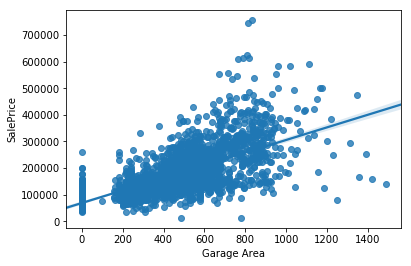

In [18]:
sns.regplot("Overall Qual", "SalePrice", ames_df)
plt.show()

sns.regplot("Gr Liv Area", "SalePrice", ames_df)
plt.show()

sns.regplot("Garage Cars", "SalePrice", ames_df)
plt.show()

sns.regplot("Garage Area", "SalePrice", ames_df)
plt.show()

In [120]:
correlation_ratio = 0.5
indices = np.where(corr_mat > correlation_ratio)
indices = [(corr_mat.index[x], corr_mat.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y and corr_mat.columns[y] == 'SalePrice']
indices

[('Overall Qual', 'SalePrice'),
 ('Year Built', 'SalePrice'),
 ('Year Remod/Add', 'SalePrice'),
 ('Mas Vnr Area', 'SalePrice'),
 ('Total Bsmt SF', 'SalePrice'),
 ('1st Flr SF', 'SalePrice'),
 ('Gr Liv Area', 'SalePrice'),
 ('Full Bath', 'SalePrice'),
 ('Garage Yr Blt', 'SalePrice'),
 ('Garage Cars', 'SalePrice'),
 ('Garage Area', 'SalePrice')]

In [121]:
# print the values in matrix itself
corr_mat

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173150,0.012186,-0.006945,0.030147,-0.050108,-0.010246,-0.052511,-0.076728,-0.030734,...,-0.011874,0.014733,0.025145,-0.024970,0.004549,0.052728,-0.006031,0.134769,-0.976099,-0.033773
PID,0.173150,1.000000,-0.000846,-0.097725,0.033223,-0.259953,0.103103,-0.340807,-0.153808,-0.228694,...,-0.051251,-0.069075,0.161766,-0.025309,-0.026689,-0.003041,-0.008557,-0.046305,0.009400,-0.244739
MS SubClass,0.012186,-0.000846,1.000000,-0.418721,-0.203366,0.040773,-0.068235,0.037825,0.044369,0.002549,...,-0.018524,-0.012102,-0.022177,-0.038250,-0.051310,-0.003565,-0.029500,0.001199,-0.018317,-0.083610
Lot Frontage,-0.006945,-0.097725,-0.418721,1.000000,0.490858,0.212558,-0.075765,0.121056,0.091324,0.223486,...,0.120241,0.158345,0.016171,0.028997,0.077916,0.175034,0.044961,0.008304,-0.007409,0.356396
Lot Area,0.030147,0.033223,-0.203366,0.490858,1.000000,0.098866,-0.034598,0.024545,0.021283,0.128121,...,0.159884,0.097568,0.019279,0.016566,0.056014,0.094457,0.069787,0.004062,-0.022220,0.265792
Overall Qual,-0.050108,-0.259953,0.040773,0.212558,0.098866,1.000000,-0.091358,0.595146,0.568091,0.429064,...,0.258130,0.296548,-0.140250,0.018905,0.043421,0.030907,0.005699,0.025712,-0.018426,0.799121
Overall Cond,-0.010246,0.103103,-0.068235,-0.075765,-0.034598,-0.091358,1.000000,-0.367249,0.051753,-0.134977,...,0.019919,-0.069620,0.073296,0.043605,0.043189,-0.017049,0.033831,-0.005757,0.030235,-0.099796
Year Built,-0.052511,-0.340807,0.037825,0.121056,0.024545,0.595146,-0.367249,1.000000,0.609377,0.313289,...,0.232367,0.196387,-0.374339,0.016681,-0.039495,0.002708,-0.010387,0.009052,-0.012295,0.558468
Year Remod/Add,-0.076728,-0.153808,0.044369,0.091324,0.021283,0.568091,0.051753,0.609377,1.000000,0.197278,...,0.220416,0.239487,-0.221145,0.038381,-0.044933,-0.010980,-0.002460,0.013427,0.034353,0.532265
Mas Vnr Area,-0.030734,-0.228694,0.002549,0.223486,0.128121,0.429064,-0.134977,0.313289,0.197278,1.000000,...,0.165389,0.144933,-0.110618,0.013700,0.065437,0.004568,0.044873,-0.000698,-0.017745,0.508606


In [76]:
def corrank(X):
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))], columns=['Features','corr'])    
        return df.sort_values(by='corr',ascending=False)

corrank_df = corrank(ames_df)
corrank_df.head(10)

,Features,corr
675,"(Garage Cars, Garage Area)",0.889494
263,"(Year Built, Garage Yr Blt)",0.842300
416,"(Total Bsmt SF, 1st Flr SF)",0.812173
516,"(Gr Liv Area, TotRms AbvGrd)",0.807422
212,"(Overall Qual, SalePrice)",0.799121
530,"(Gr Liv Area, SalePrice)",0.708248
606,"(Bedroom AbvGr, TotRms AbvGrd)",0.671077
466,"(2nd Flr SF, Gr Liv Area)",0.660483
293,"(Year Remod/Add, Garage Yr Blt)",0.655820
685,"(Garage Cars, SalePrice)",0.647001


We can't just drop all rows with NA values as NA at most places means a lack of a particular entity. e.g.- pool QC = NA means lack of pool

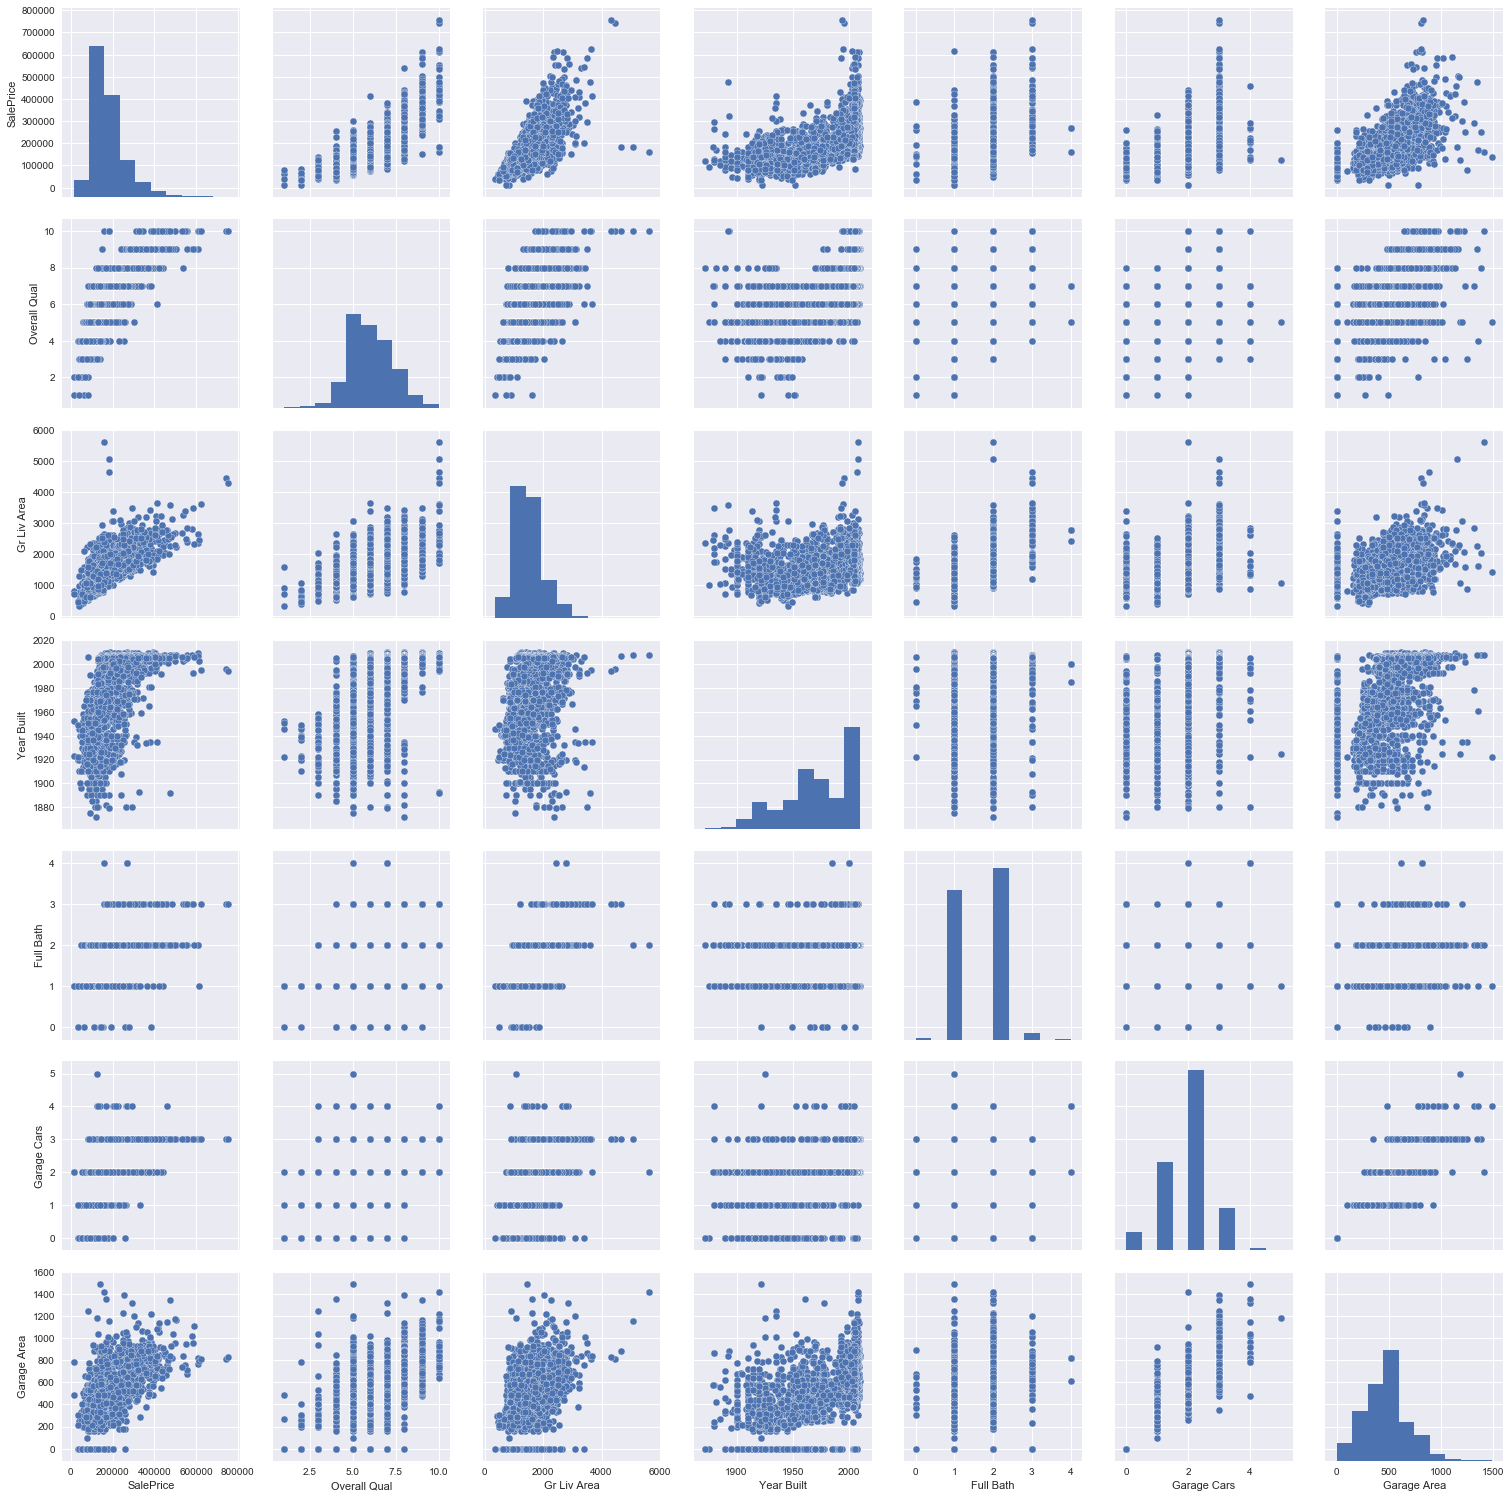

In [77]:
sns.set()
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Year Built', 'Full Bath', 'Garage Cars', 'Garage Area']
sns.pairplot(ames_df[cols], size = 3)
plt.show();

In [9]:
cols = ames_df.columns
quantitative = list(ames_df._get_numeric_data().columns)
print("Quantitative variables are:\n")
print(quantitative)

Quantitative variables are:

['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


In [10]:
qualitative = list(set(cols) - set(quantitative))
print("Qualitative variables are:\n")
print(qualitative)

Qualitative variables are:

['Pool QC', 'Exter Qual', 'Lot Shape', 'Exterior 1st', 'Misc Feature', 'Garage Qual', 'Paved Drive', 'Neighborhood', 'Utilities', 'House Style', 'Condition 1', 'Bsmt Qual', 'Fireplace Qu', 'Sale Condition', 'Garage Cond', 'Central Air', 'BsmtFin Type 1', 'Exterior 2nd', 'Functional', 'Fence', 'Land Contour', 'Roof Matl', 'Roof Style', 'Lot Config', 'Exter Cond', 'Condition 2', 'Bsmt Exposure', 'Alley', 'Foundation', 'Garage Finish', 'Heating QC', 'Land Slope', 'Street', 'MS Zoning', 'Bsmt Cond', 'Heating', 'Sale Type', 'BsmtFin Type 2', 'Electrical', 'Garage Type', 'Kitchen Qual', 'Bldg Type', 'Mas Vnr Type']


In [32]:
for i in qualitative:
    ames_df[i] = ames_df[i].astype('category')
    if ames_df[i].isnull().any():
        ames_df[i] = ames_df[i].cat.add_categories(['Missing/NA'])
        ames_df[i] = ames_df[i].fillna('Missing/NA')

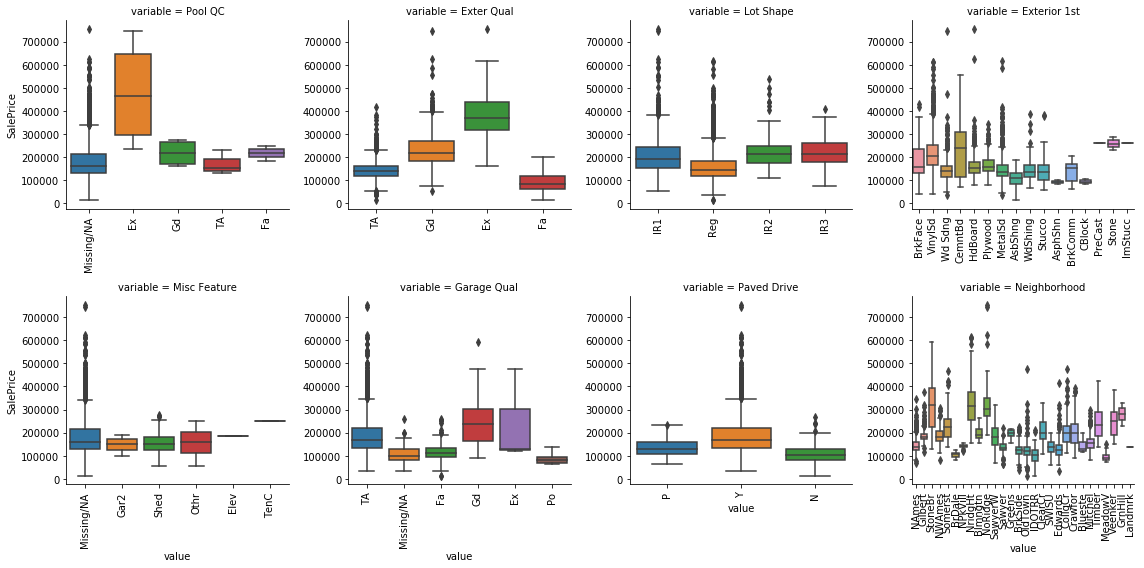

In [34]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative[0:8])
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size=4)
g = g.map(boxplot, "value", "SalePrice")

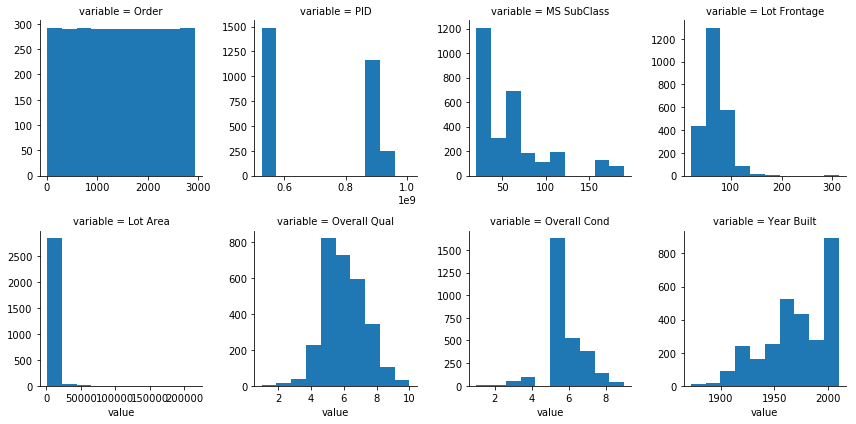

In [35]:
f = pd.melt(train, value_vars=quantitative[0:8])
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(plt.hist, "value")

In [122]:
ames_df[quantitative].isna().sum()

Order                0
PID                  0
MS SubClass          0
Lot Frontage       484
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         0
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      157
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [138]:
# dropping an individual column
ames_df.ix[:, ames_df.columns != 'SalePrice']
ames_df.drop('SalePrice', axis=1)
ames_df.shape

(2903, 82)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(ames_df.drop('SalePrice', axis=1), 
                                                    ames_df["SalePrice"], test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1945, 81)
(958, 81)
(1945,)
(958,)


In [52]:
pca = PCA(2)
quantitative_ml = list(quantitative)
quantitative_ml.remove('SalePrice')
len(quantitative_ml)

38

In [53]:
ames_pca = X_train.dropna(subset = ['Garage Yr Blt','Lot Frontage'])
ames_pca.shape

quantitative_ml = list(quantitative)
quantitative_ml.remove('SalePrice')
len(quantitative_ml)

pca = PCA(2)
pca.fit(ames_pca[quantitative_ml])
print(pca.explained_variance_)
print(np.sum(pca.explained_variance_ratio_))

[3.54962475e+16 5.27665572e+07]
0.9999999999346216


In [54]:
X_train = pca.transform(ames_pca[quantitative_ml])
ames_pca = X_test.dropna(subset = ['Garage Yr Blt','Lot Frontage'])
X_test = pca.transform(ames_pca[quantitative_ml])
print(X_train.shape)
print(X_test.shape)

(1541, 2)
(732, 2)


In [64]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
kmeans.labels_

array([1, 4, 3, ..., 9, 0, 3], dtype=int32)

In [65]:
kmeans.cluster_centers_

array([[-1.77623894e+08, -1.63573665e+03],
       [ 1.97469334e+08,  3.20743593e+02],
       [ 2.13019558e+08, -7.75385672e+02],
       [ 1.92699980e+08, -1.82764278e+03],
       [-1.81833706e+08,  1.12967215e+03],
       [ 2.05595677e+08,  6.68792087e+03],
       [-1.75160570e+08, -3.97876331e+01],
       [ 1.95636986e+08,  1.34739824e+03],
       [ 1.99650037e+08, -1.10070300e+03],
       [-1.82853637e+08, -4.10550909e+02]])

In [66]:
y_kmeans = kmeans.predict(X_test)

In [67]:
X_train

array([[ 1.98090396e+08, -7.58318925e+03],
       [-1.81666644e+08,  2.60142979e+03],
       [ 1.92108406e+08, -3.22660488e+03],
       ...,
       [-1.82769674e+08,  2.17278476e+03],
       [-1.78715634e+08, -1.23803114e+03],
       [ 1.92107416e+08, -4.12973452e+03]])

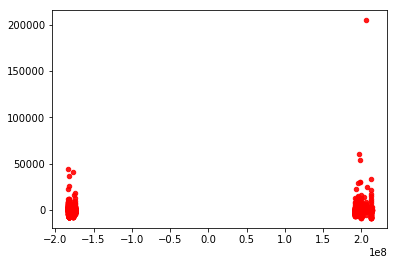

In [76]:
centers = kmeans.cluster_centers_
plt.scatter(X_train[:, 0], X_train[:, 1], c="red", s=20, alpha=.9);